In [1]:
import pywt

In [2]:
import matplotlib

In [3]:
import matplotlib.pyplot as plt

In [4]:
import scipy

1.9875690051534864e-11


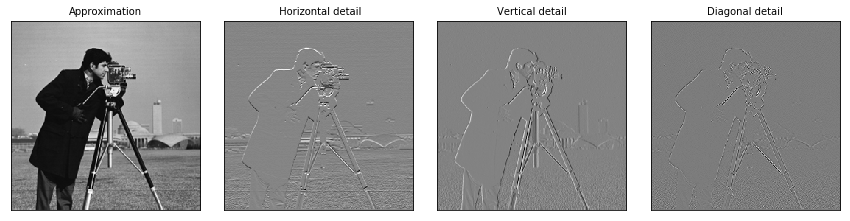

In [5]:
import numpy as np
import matplotlib.pyplot as plt

import pywt
import pywt.data


# Load image
original = pywt.data.camera()

# Wavelet transform of image, and plot approximation and details
titles = ['Approximation', ' Horizontal detail',
          'Vertical detail', 'Diagonal detail']
coeffs2 = pywt.dwt2(original, 'bior1.3')
(LL, (LH, HL, HH)) = coeffs2

recon = pywt.idwt2(coeffs2,'bior1.3','smooth')

print(np.linalg.norm(recon-original))


# recon = None
# for M in [LL, LH, HL, HH]:
# 	if recon is None:
# 		recon = M
# 	else:
# 		recon

fig = plt.figure(figsize=(12, 3))
for i, a in enumerate([LL, LH, HL, HH]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])



fig.tight_layout()
plt.show()


In [6]:
original.shape

(512, 512)

In [8]:
d = original.flatten().shape[0]/2



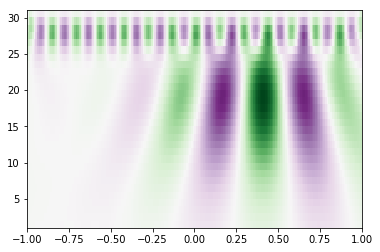

In [9]:
from scipy import signal
import matplotlib.pyplot as plt
t = np.linspace(-1, 1, 200, endpoint=False)
sig  = np.cos(2 * np.pi * 7 * t) + signal.gausspulse(t - 0.4, fc=2)
widths = np.arange(1, 31)
cwtmatr = signal.cwt(sig, signal.ricker, widths)
plt.imshow(cwtmatr, extent=[-1, 1, 1, 31], cmap='PRGn', aspect='auto',
vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())
plt.show()

In [10]:
res = pywt.dwt(original.flatten(),'haar')

In [11]:
orig = pywt.idwt(res[0],res[1],'haar')
print(np.linalg.norm(orig-original.flatten()))

1.1291665581657731e-11


In [18]:
WT_METHOD = 'haar'
def L1_norm(X):
    return np.linalg.norm(X, ord=1)

def L2_dist(X,Y):
    if len(X)%2 != 0 or len(Y) != len(X):
        raise Exception('Expecting even lengthed vectors')
    i_mid = int(len(X)/2)
    Xa,Xb = X[:i_mid],X[i_mid:]
    recon = pywt.idwt(Xa,Xb,WT_METHOD)
    return np.linalg.norm(Y-recon,ord=2)


In [19]:
Y = original.flatten()
res = pywt.dwt(Y,'haar')
X = np.concatenate([res[0],res[1]])
print(L1_norm(X))
print(L2_dist(X,Y))

22368198.723054342
1.1291665581657731e-11


In [26]:
obj_f = lambda x: L1_norm(x) + L2_dist(x,Y)
res = scipy.optimize.minimize(obj_f, X, method='nelder-mead',
              options={'xtol': 1e-2, 'disp': True, 'maxiter' :10^3})

KeyboardInterrupt: 